In [1]:
import numpy as np
from bound_rewards import *
from lava_one_step import main as lava_problem

### Compute our bound for one-step lava problem

In [2]:
# One-step Lava Problem: Our bounds
p_correct_vals = np.linspace(0.01, 0.99, 20) 
reward_xs = np.array([0.1]) 
reward_x = reward_xs[0]
bounds = []
for p_correct in p_correct_vals:
    nx, nu, ny, T, p0, px_x, py_x, R, R0_expected = lava_problem(['--p_correct', str(p_correct), '--reward_x', str(reward_x)])
    bound_inverse = compute_bound(nx, nu, ny, T, p0, px_x, py_x, R, R0_expected) 
    bounds.append(bound_inverse)


### Generalized Fano's Inequality
$R_\text{Bayes}$: Bayesian risk \
$L$: Loss function \
$I$: Mutual information \
$\theta \in\Theta$: Parameter describing data, $x\sim\mathcal X \sim P_\theta$ \
$w$: Prior distribution of true parameter $\theta$ 

$$R_\text{Bayes} (w) \geq 1+\frac{I(w,\mathcal P)+\log 2}{\log(\sup_{a\in\mathcal A}w\{\theta\in\Theta:L(\theta,a)=0\})}$$

$$1+\frac{\mathbb I+\log(1+R^\perp)}{\log(1-R^\perp}\leq \inf_\pi\mathbb E[C_\pi]$$

Setting $C_\pi=1-R_\pi, \sup_\pi R_\pi = 1-\inf_\pi C_\pi$,

$$1+\frac{\mathbb I+\log(1+R^\perp)}{\log(1-R^\perp}\leq \inf_\pi\mathbb E[C_\pi]=1-\sup_\pi \mathbb E [R_\pi]\\\sup_\pi \mathbb E [R_\pi]\leq\frac{\mathbb I+\log(1+R^\perp)}{\log(1/(1-R^\perp)}$$

In [19]:
# Definition of Fano bound
def bound_Fano(R_perp, I):
    return -(I+np.log(1+R_perp))/np.log(1-R_perp)

def compute_Fano(nx, nu, ny, T, p0, px_x, py_x, R, R0_expected):
	'''
    One step Fano bound (T=1)
    '''
	# Compute R_perp
	R_u = p0[0] * R
	Rt_perp = np.max(R_u)

    # Compute mutual information
	px_0 = p0 # Probability of x_0
	pyx_0 = py_x*px_0[None,:]  # pyx(i,j) is probability of measurement i and state j 
	py_0 = np.sum(pyx_0, 1)

	I = 0.0
	for ii in range(0,ny):
		for jj in range(0,nx):
			if (np.abs(pyx_0[ii,jj]) > 1e-5):
				# mutual information using KL divergence
				I = I + pyx_0[ii,jj]*np.log(pyx_0[ii,jj]/(py_0[ii]*px_0[jj]))
	bound = bound_Fano(Rt_perp, I)
	
	return bound



In [20]:
# One-step Lava Problem: Fano bounds

bounds_Fano = []
for p_correct in p_correct_vals:
    nx, nu, ny, T, p0, px_x, py_x, R, R0_expected = lava_problem(['--p_correct', str(p_correct), '--reward_x', str(reward_x)])
    Fano_b = compute_Fano(nx, nu, ny, T, p0, px_x, py_x, R, R0_expected) 
    bounds_Fano.append(Fano_b)

In [22]:
from lava_problem_pomdp_one_step import main as lava_problem_pomdp
opt_values = []
for p_correct in p_correct_vals:
    opt_value = lava_problem_pomdp(['--p_correct', str(p_correct), '--reward_x', str(reward_x)])
    opt_values.append(opt_value)

***Computing value via POMDP solution***
Optimal value:  0.325
Optimal cost:  0.675
***Computing value via POMDP solution***
Optimal value:  0.32499999999999996
Optimal cost:  0.675
***Computing value via POMDP solution***
Optimal value:  0.32499999999999996
Optimal cost:  0.675
***Computing value via POMDP solution***
Optimal value:  0.325
Optimal cost:  0.675
***Computing value via POMDP solution***
Optimal value:  0.32499999999999996
Optimal cost:  0.675
***Computing value via POMDP solution***
Optimal value:  0.325
Optimal cost:  0.675
***Computing value via POMDP solution***
Optimal value:  0.325
Optimal cost:  0.675
***Computing value via POMDP solution***
Optimal value:  0.325
Optimal cost:  0.675
***Computing value via POMDP solution***
Optimal value:  0.325
Optimal cost:  0.675
***Computing value via POMDP solution***
Optimal value:  0.32500000000000007
Optimal cost:  0.6749999999999999
***Computing value via POMDP solution***
Optimal value:  0.325
Optimal cost:  0.675
***Comp

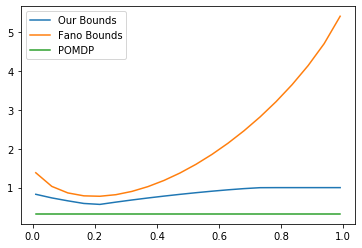

In [23]:
import matplotlib.pyplot as plt

plt.plot(p_correct_vals,bounds, label='Our Bounds')
plt.plot(p_correct_vals,bounds_Fano, label='Fano Bounds')
plt.plot(p_correct_vals,opt_values,label='POMDP')
plt.legend()